In [1]:
import pandas as pd
import glob

In [2]:
# loading 10 files together will kill the kernel, so use smaller number ...
# realistically, it's enough recipes... even with just one pickle (100k)... 

files = sorted(glob.glob('layer1.json.[0-2].valid.gz'))
df = pd.concat([pd.read_pickle(fp) for fp in files], ignore_index=True)

In [3]:
df.shape

(299999, 9)

In [4]:
df.groupby('partition').size()

partition
test      44829
train    209738
val       45432
dtype: int64

In [8]:
df.groupby(['collection']).size()

collection
allrecipes.com              14252
cookeatshare.com            17544
cooking.nytimes.com          4906
cookpad.com                 17890
online-cookbook.com          1711
recipeland.com               7956
tastykitchen.com            22134
www.chowhound.com            1843
www.cookstr.com              2676
www.delish.com               1233
www.epicurious.com          14301
www.food.com               147985
www.foodandwine.com          5206
www.foodgeeks.com            3040
www.foodnetwork.com         16959
www.foodrepublic.com          685
www.kraftrecipes.com        14933
www.landolakes.com            704
www.lovefood.com              578
www.myrecipes.com            2104
www.vegetariantimes.com      1359
dtype: int64

#### Distribution of number of ingredients in the recipes

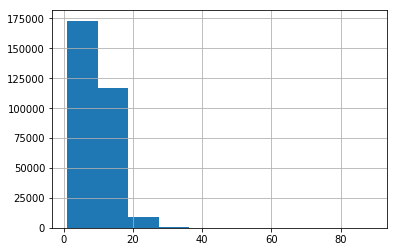

In [33]:
import matplotlib.pyplot as plt

plt.figure()
df.ingr_count.hist()

#### Distribution of number of instructions in the recipes

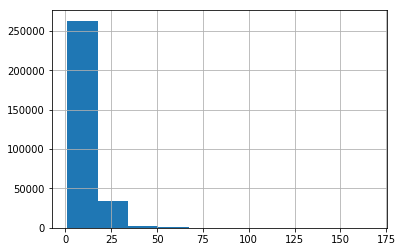

In [35]:
plt.figure()

df.instr_count.hist()

In [22]:
# let's filter out epicurious recipes with less than 10 steps
keep_columns = ['id', 'partition', 
                'collection', 'title', 
                'ingr_count', 'instr_count', 
                'ingredients', 'instructions']

epicurious = df[(df.collection == 'www.epicurious.com') 
   & (df.instr_count<=10)][keep_columns].sort_values(by=['instr_count'], ascending=False)

# train, val, test counts
epicurious.groupby('partition').size()

partition
test      879
train    4214
val       948
dtype: int64

#### Distribution of ingredients in the <= 10 steps Epicurious recipes

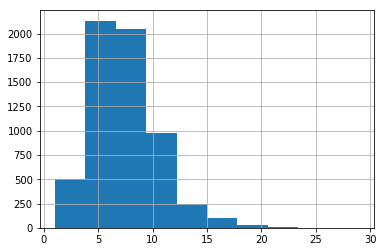

In [37]:
plt.figure()
epicurious.ingr_count.hist()

#### Distribution of steps in the <= 10 steps Epicurious recipes

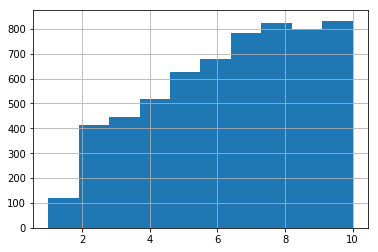

In [38]:
plt.figure()
epicurious.instr_count.hist()

In [31]:
# one example of ingredients and instructions
print('Ingredients:')
print(epicurious['ingredients'][142598])
print('\n')
print('Instructions:')
print(epicurious['instructions'][142598])

Ingredients:
[{'text': '1/2 pound lean beef, preferably sirloin, sliced as thinly as possible'}, {'text': '2 garlic cloves, minced'}, {'text': '3 tablespoons soy sauce'}, {'text': '1 tablespoon dark sesame oil'}, {'text': '3 ounces miyuk (wakame) seaweed, broken into bits'}, {'text': '2 tablespoons corn, grapeseed, or other neutral oil'}, {'text': '2 scallions, cut into 2-inch lengths, plus chopped scallion for garnish'}, {'text': 'Salt and black pepper to taste'}]


Instructions:
[{'text': 'Mix the beef with the garlic, soy sauce, and sesame oil and marinate for a few minutes.'}, {'text': 'Meanwhile, thoroughly wash the seaweed under cold running water.'}, {'text': 'Heat the oil in a large saucepan over medium-high heat.'}, {'text': 'Add the beef with its marinade and brown, about 2 minutes, then add the seaweed and cook, stirring, for another 2 minutes.'}, {'text': 'Add the scallions and 5 cups water to the saucepan and bring to a boil.'}, {'text': 'Lower the heat and simmer, partial